# student performance analysis project

**Course:** Statistical Methods for Data Analysis

**Student:** Reema Mohammed

**Instructor:** Dr. Ayman Qahmash

**Dataset:** `StudentPerformanceFactors.csv`  
**Target Variable:** `Exam_Score`

Columns in dataset:
Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')
First 5 rows:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motiv

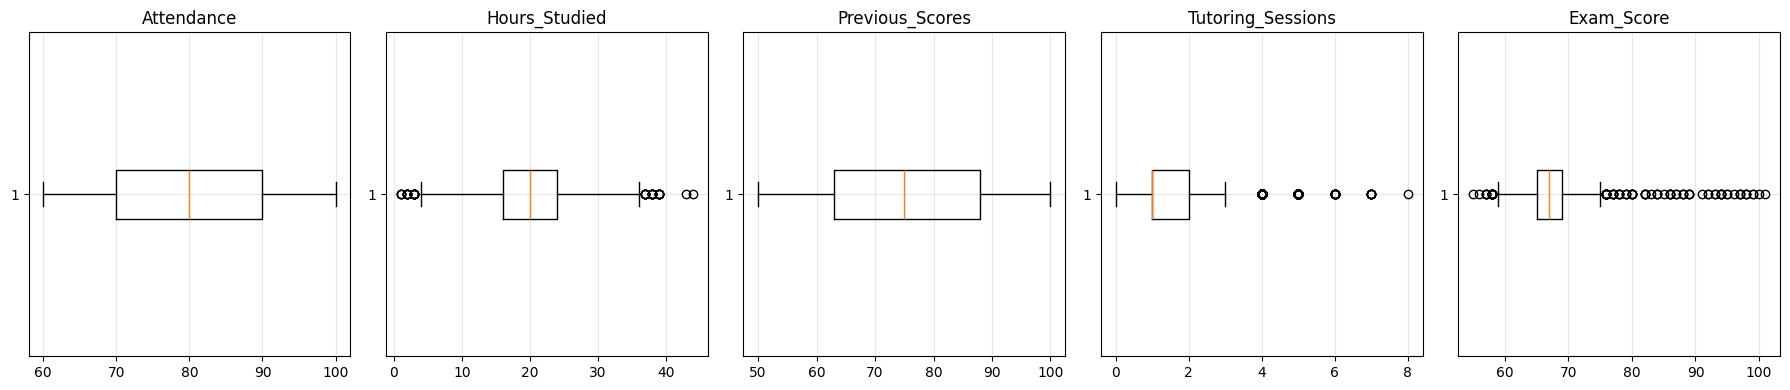

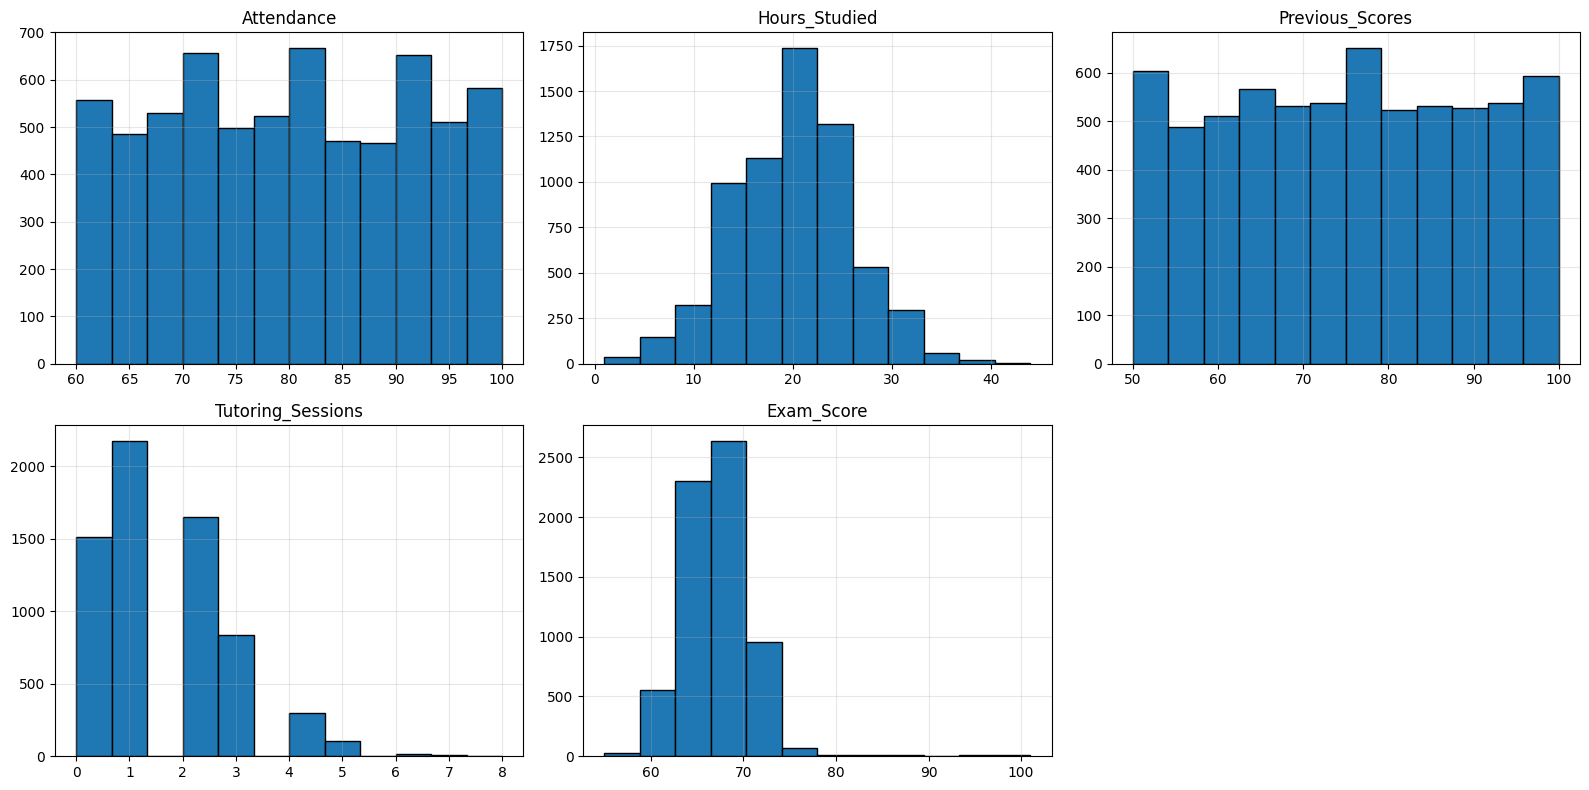

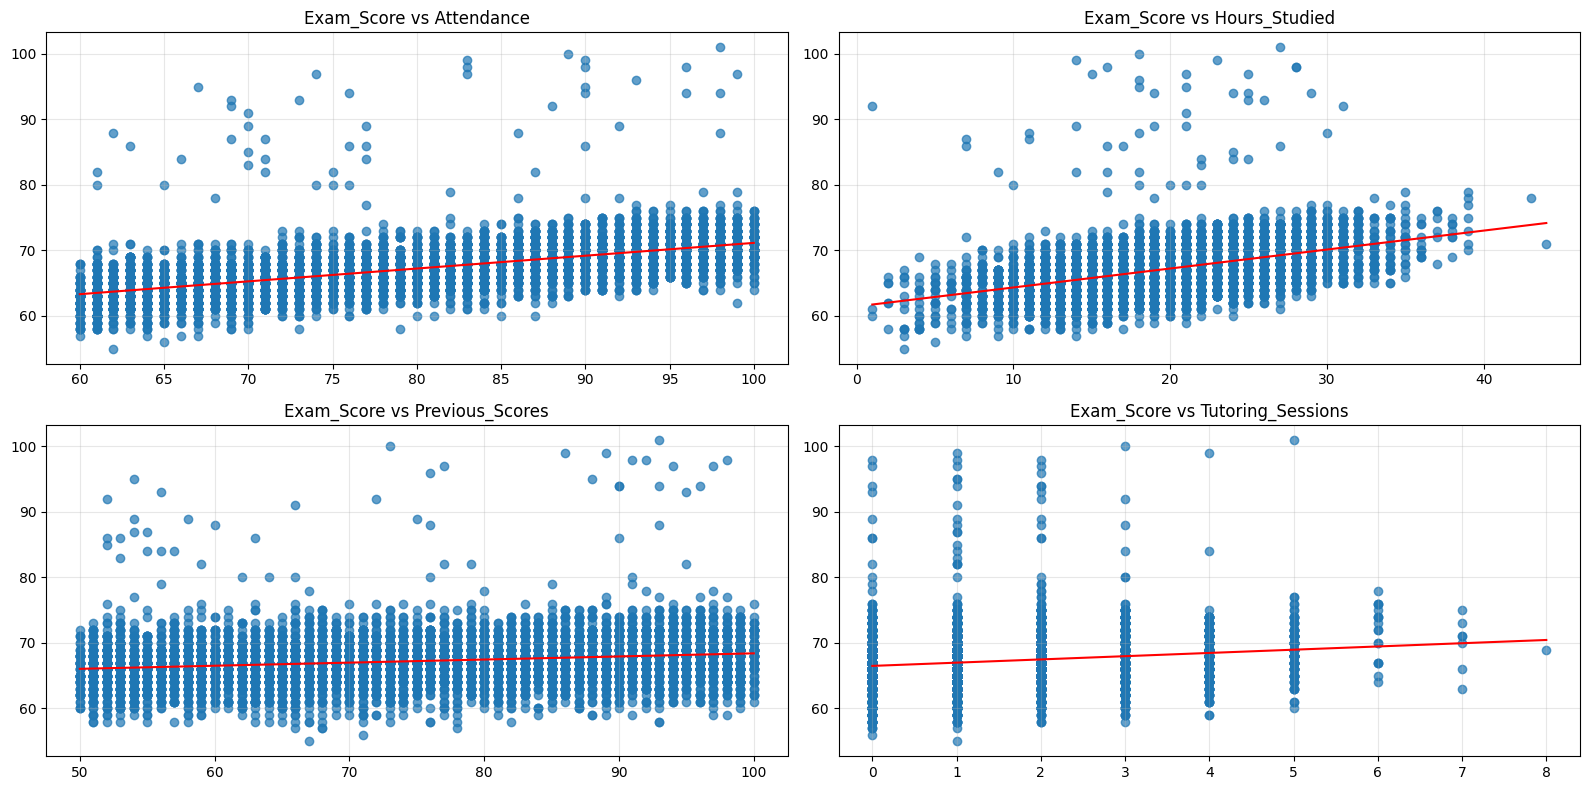

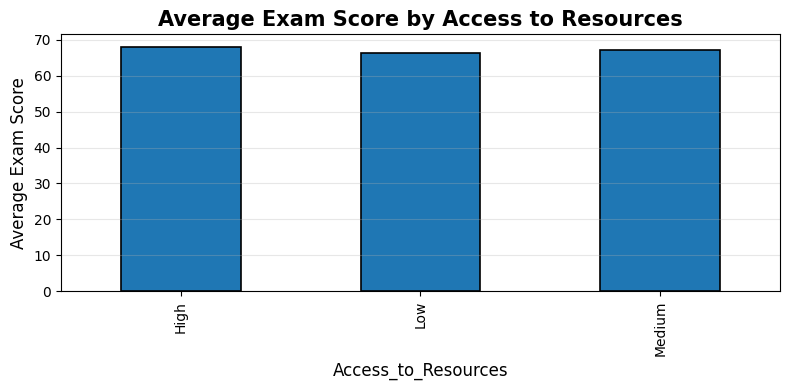


=== Coefficients ===
Attendance: 0.1969
Hours_Studied: 0.2898
Previous_Scores: 0.0480
Tutoring_Sessions: 0.5309
Access_to_Resources_Low: -1.9822
Access_to_Resources_Medium: -0.9115

Intercept: 42.1699
R²: 0.6664
RMSE: 2.2132
MAE: 1.1844


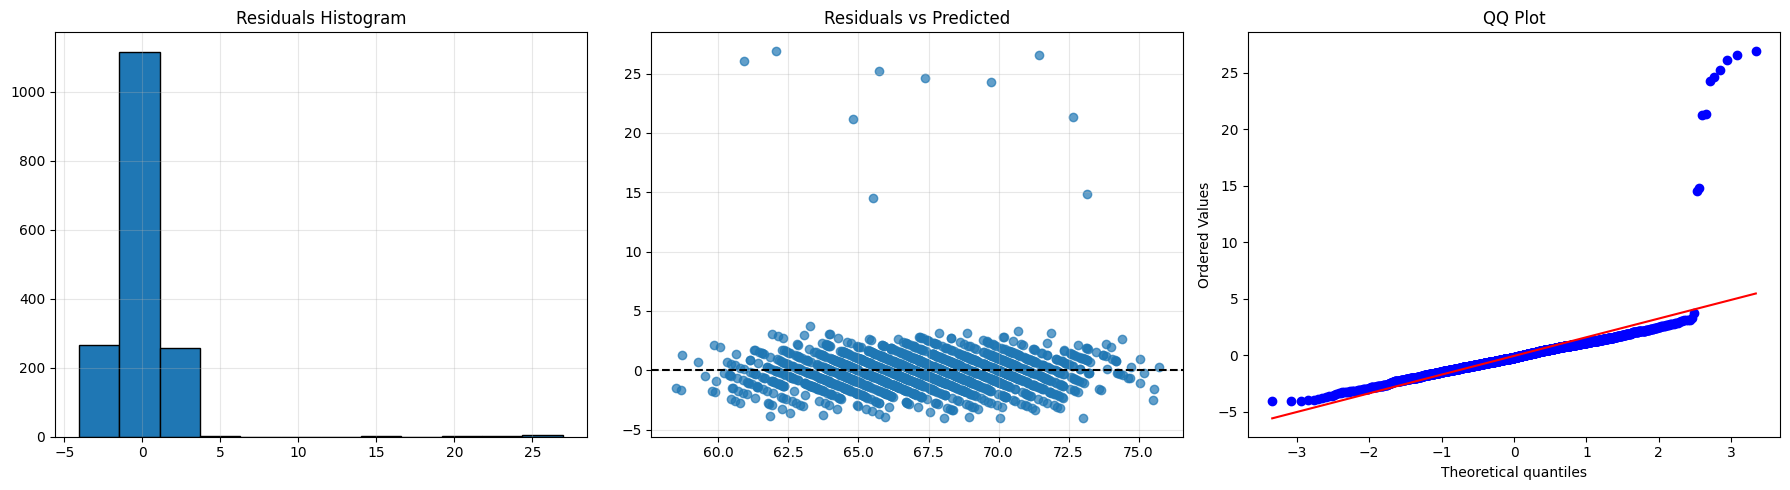

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats
import scipy.stats as sps

# 1.Load data
#------------------------------------------------------
df = pd.read_csv("StudentPerformanceFactors.csv")
print("Columns in dataset:")
print(df.columns)
print("First 5 rows:")
print(df.head())


# 2.Preprocessing
#---------------------------------------------------------
# 2.1One-hot encode Access_to_Resources (High / Medium / Low)
df_encoded = pd.get_dummies(df, columns=["Access_to_Resources"], drop_first=True)
print("\nColumns after encoding:")
print(df_encoded.columns)

# 2.2Define features and target
base_features = [
    "Attendance",
    "Hours_Studied",
    "Previous_Scores",
    "Tutoring_Sessions"
]
resource_cols = [col for col in df_encoded.columns if col.startswith("Access_to_Resources_")]
features = base_features + resource_cols
print("\nUsing features:")
for f in features:
    print(" -", f)

target = "Exam_Score"


# 3.Data Cleaning
#--------------------------------------------------------
# 3.1 We choose important columns for the model and analysis
data = df_encoded[features + [target]]

#3.2 Summary of missing values
print("\n=== Missing values in selected columns ===")
print(data.isna().sum())

# 3.3 Dealing with missing values (deleting rows that contain NaN)
data = data.dropna()
print("Shape after dropping rows with missing values:", data.shape)

# 3.4 Dealing with duplicates
dup_count = data.duplicated().sum()
print("Number of duplicate rows:", dup_count)

if dup_count > 0:
    data = data.drop_duplicates().reset_index(drop=True)
    print("Shape after dropping duplicates:", data.shape)
else:
    print("No duplicate rows were found.")

# 3.5 Processing X and y after cleaning
X = data[features]
y = data[target]


# 4.Exploratory Data Analysis (EDA)
#--------------------------------------------------------
# 4.1 Descriptive statistics
print("\n=== Descriptive statistics (features + Exam_Score) ===")
print(data[features + [target]].describe().T)

# 4.2 Correlation matrix (Attribute Relationship Analysis)
print("\nCorrelation of all selected features with Exam_Score:")
correlations = data.corr()["Exam_Score"].sort_values(ascending=False)
print(correlations)

# 4.3 Outlier Detection (Boxplots + IQR Method)
print("\n=== IQR Outlier Detection ===")
numeric_cols = ["Attendance", "Hours_Studied", "Previous_Scores",
                "Tutoring_Sessions", target]

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"\n{col}:")
    print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
    print(f"Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}")
    print(f"Number of Outliers = {len(outliers)}")

# 4.3.1 Boxplot visualization
plt.figure(figsize=(18, 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    plt.boxplot(data[col], vert=False)
    plt.title(col, fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# 4.4 Histograms for numeric predictors + Exam_Score
numeric_for_hist = base_features + [target]
plt.figure(figsize=(16, 8))

for i, col in enumerate(numeric_for_hist, 1):
    plt.subplot(2, 3, i)
    plt.hist(data[col], bins=12, edgecolor="black")
    plt.title(col, fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# 4.5 Scatter plots + regression line (Exam_Score with each numerical variable)
plt.figure(figsize=(16, 8))

for i, col in enumerate(base_features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(data[col], data[target], alpha=0.7)
    slope, intercept, _, _, _ = stats.linregress(data[col], data[target])
    xs = np.linspace(data[col].min(), data[col].max(), 100)
    ys = intercept + slope * xs
    plt.plot(xs, ys, color="red")
    plt.title(f"{target} vs {col}", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# 4.6 Bar chart: Average Exam_Score by Access_to_Resources
plt.figure(figsize=(8,4))
mean_by_resources = df.groupby("Access_to_Resources")[target].mean()
mean_by_resources.plot(kind="bar", edgecolor="black", linewidth=1.2)
plt.title("Average Exam Score by Access to Resources", fontsize=15, fontweight="bold")
plt.xlabel("Access_to_Resources", fontsize=12)
plt.ylabel("Average Exam Score", fontsize=12)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


# 5. Modeling — Linear Regression
#------------------------------------------------------
# 5.1 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# 5.2 Build and train model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# 6.Model Evaluation
#------------------------------------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print("\n=== Coefficients ===")
for name, coef in zip(features, model.coef_):
    print(f"{name}: {coef:.4f}")

print(f"\nIntercept: {model.intercept_:.4f}")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# 7.Residual analysis
#------------------------------------------------------
residuals = y_test - y_pred
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 7.1 Histogram
axes[0].hist(residuals, bins=12, edgecolor="black")
axes[0].set_title("Residuals Histogram")
axes[0].grid(alpha=0.3)

# 7.2 Residuals vs Predicted
axes[1].scatter(y_pred, residuals, alpha=0.7)
axes[1].axhline(0, color="black", linestyle="--")
axes[1].set_title("Residuals vs Predicted")
axes[1].grid(alpha=0.3)

# 7.3 QQ Plot
sps.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title("QQ Plot")
plt.tight_layout()
plt.show()